In [1]:
from skimage.io import imread
from skimage.data import astronaut, lena
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
as_image = astronaut()

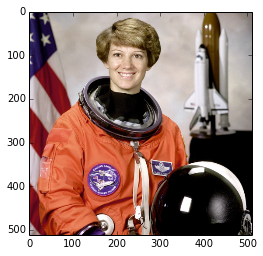

In [3]:
plt.imshow(as_image)

In [4]:
def get_gray_img(img):

    i_size = img.shape[0]
    
    bordered_image = np.zeros((i_size + 2, i_size + 2))
    
    gray_img = (img * [.299, .587, .114]).sum(axis=2)
    
    bordered_image[1:-1,1:-1] = gray_img.copy()
    
    return gray_img


def apply_sobel(img, use_schar=False, is_grey=False):
    if use_schar:
        kernel_x = np.array([[3, 0, -3], [10, 0, -10], [3, 0, -3]])
        kernel_y = np.array([[3, 10, 3], [0, 0, 0], [-3, -10, -3]])
    else:
        kernel_x = np.array([[1, 0, -1], [2, 0, -2], [1, 0, -1]])
        kernel_y = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])
    
    i_size = img.shape[0]
    
    der_x = np.zeros((i_size, i_size))
    der_y = np.zeros((i_size, i_size))
    if not is_grey:
        gray_img = get_gray_img(img)
    else:
        gray_img = img
    i_size = img.shape[0]
    
    for i in range(i_size - 2):
        for j in range(i_size - 2):
            der_x[i][j] = (gray_img[i:i + 3, j:j + 3] * kernel_x).sum()
            der_y[i][j] = (gray_img[i:i + 3, j:j + 3] * kernel_y).sum()
    
    return der_x, der_y, (der_x ** 2 + der_y ** 2) ** (0.5)

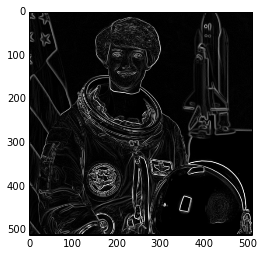

In [10]:
grad_img = apply_sobel(as_image)[2]

plt.imshow(grad_img, cmap=plt.cm.Greys_r)